In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import multiprocessing
from sklearn.preprocessing import LabelEncoder
from scipy import stats

from math import sin, cos, sqrt, atan2, radians
%matplotlib inline

## 2001년도부터 2017년 10월까지의 범죄 데이터

In [2]:
crime = pd.read_csv('crime_final.csv')
crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Year,Updated On,Latitude,Longitude,Location,weekday,crime-pod,pod,police_count,nearest_police
0,4647380,HL762080,2005-11-29 15:10:00,112XX S WALLACE ST,1340,CRIMINAL DAMAGE,2.585067,"SCHOOL, PUBLIC, BUILDING",False,False,...,2005,04/15/2016 08:55:02 AM,41.689957,-87.637461,"(41.68995741, -87.637460623)",Tue,100.000000,a,0,Morgan Park
1,4647496,HL602321,2005-09-09 22:28:28,004XX N CLARK ST,0320,ROBBERY,1.843985,OTHER,False,False,...,2005,04/15/2016 08:55:02 AM,41.889414,-87.631066,"(41.88941436, -87.631065571)",Fri,1.319511,49,0,Near North
2,4647501,HL602470,2005-09-10 00:31:00,011XX N HALSTED ST,0810,THEFT,0.390140,OTHER,False,False,...,2005,04/15/2016 08:55:02 AM,41.903137,-87.648063,"(41.903136692, -87.648062686)",Sat,0.788944,49,1,Near North
3,4647509,HL609057,2005-09-13 08:58:51,021XX N CLIFTON AVE,1320,CRIMINAL DAMAGE,2.253234,OTHER,False,False,...,2005,04/15/2016 08:55:02 AM,41.920729,-87.657094,"(41.920728602, -87.657093605)",Tue,100.000000,a,0,Near North
4,4647514,HL611344,2005-09-14 10:24:48,006XX N MICHIGAN AVE,0860,THEFT,1.899044,OTHER,False,False,...,2005,04/15/2016 08:55:02 AM,41.893813,-87.624230,"(41.893812529, -87.624229924)",Wed,100.000000,a,0,Near North


In [3]:
len(crime.columns)

27

## 경찰서 데이터

In [4]:
police_station = pd.read_csv('Police_Stations.csv')
police_station.head()

,DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,COMMUNITY AREA,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,1,Central,1718 S State St,Chicago,IL,60616,33,http://home.chicagopolice.org/community/distri...,312-745-4290,312-745-3694,312-745-3693,1176569.052,1891771.704,41.858373,-87.627356,"(41.8583725929, -87.627356171)"
1,2,Wentworth,5101 S Wentworth Ave,Chicago,IL,60609,37,http://home.chicagopolice.org/community/distri...,312-747-8366,312-747-5396,312-747-6656,1175864.837,1871153.753,41.801811,-87.630560,"(41.8018110912, -87.6305601801)"
2,3,Grand Crossing,7040 S Cottage Grove Ave,Chicago,IL,60637,42,http://home.chicagopolice.org/community/distri...,312-747-8201,312-747-5479,312-747-9168,1182739.183,1858317.732,41.766431,-87.605748,"(41.7664308925, -87.6057478606)"
3,4,South Chicago,2255 E 103rd St,Chicago,IL,60617,51,http://home.chicagopolice.org/community/distri...,312-747-7581,312-747-5276,312-747-9169,1193131.299,1837090.265,41.707933,-87.568349,"(41.7079332906, -87.5683491228)"
4,5,Calumet,727 E 111th St,Chicago,IL,60628,50,http://home.chicagopolice.org/community/distri...,312-747-8210,312-747-5935,312-747-9170,1183305.427,1831462.313,41.692723,-87.604506,"(41.6927233639, -87.6045058667)"


In [5]:
len(police_station.index)

23

### 데이터 가공

In [6]:
crime0 = []
crime0.append(crime[(crime['Date']>='2005-01-01') & (crime['Date']<'2006-01-01')])
crime0.append(crime[(crime['Date']>='2006-01-01') & (crime['Date']<'2007-01-01')])
crime0.append(crime[(crime['Date']>='2007-01-01') & (crime['Date']<'2008-01-01')])
crime0.append(crime[(crime['Date']>='2008-01-01') & (crime['Date']<'2009-01-01')])
crime0.append(crime[(crime['Date']>='2009-01-01') & (crime['Date']<'2010-01-01')])
crime0.append(crime[(crime['Date']>='2010-01-01') & (crime['Date']<'2011-01-01')])
crime0.append(crime[(crime['Date']>='2011-01-01') & (crime['Date']<'2012-01-01')])
crime0.append(crime[(crime['Date']>='2012-01-01') & (crime['Date']<'2013-01-01')])
crime0.append(crime[(crime['Date']>='2013-01-01') & (crime['Date']<'2014-01-01')])
crime0.append(crime[(crime['Date']>='2014-01-01') & (crime['Date']<'2015-01-01')])
crime0.append(crime[(crime['Date']>='2015-01-01') & (crime['Date']<'2016-01-01')])
crime0.append(crime[(crime['Date']>='2016-01-01') & (crime['Date']<'2017-01-01')])
crime0.append(crime[crime['Date']>='2017-01-01'])

In [7]:
crime0[5].head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Year,Updated On,Latitude,Longitude,Location,weekday,crime-pod,pod,police_count,nearest_police
2158320,10518449,HZ260208,2010-02-01 00:01:00,022XX S KOSTNER AVE,1153,DECEPTIVE PRACTICE,10000.0,RESIDENCE,False,False,...,2010,05/12/2016 03:50:15 PM,NaN,NaN,NaN,Mon,100.0,a,0,NaN
2158321,10521112,HZ262966,2010-09-01 10:30:00,073XX N SEELEY AVE,1153,DECEPTIVE PRACTICE,10000.0,APARTMENT,False,False,...,2010,05/14/2016 03:53:39 PM,NaN,NaN,NaN,Wed,100.0,a,0,NaN
2158322,7329288,HS132570,2010-01-17 00:00:00,044XX N LAPORTE AVE,0497,BATTERY,10000.0,RESIDENCE,False,True,...,2010,04/15/2016 11:16:05 AM,NaN,NaN,NaN,Sun,100.0,a,0,NaN
2158323,7362186,HS164448,2010-02-14 01:00:00,070XX N CALDWELL AVE,0486,BATTERY,10000.0,RESIDENCE,False,False,...,2010,04/15/2016 11:16:05 AM,NaN,NaN,NaN,Sun,100.0,a,0,NaN
2158324,7401346,HS203166,2010-03-11 18:01:00,035XX S MICHIGAN AVE,2820,OTHER OFFENSE,10000.0,POLICE FACILITY/VEH PARKING LOT,False,True,...,2010,04/15/2016 11:16:05 AM,NaN,NaN,NaN,Thu,100.0,a,0,NaN


# 반경 몇 km내에 경찰서가 있는 경우

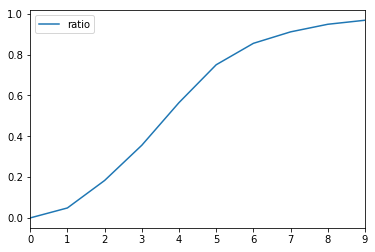

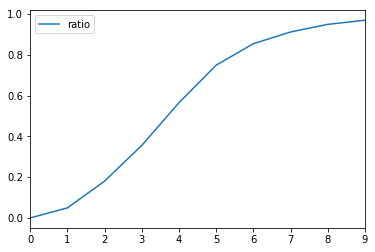

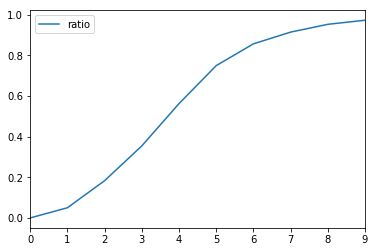

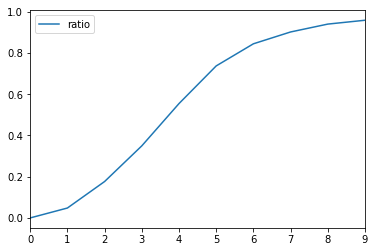

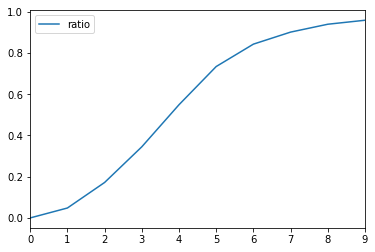

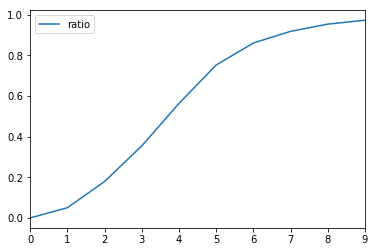

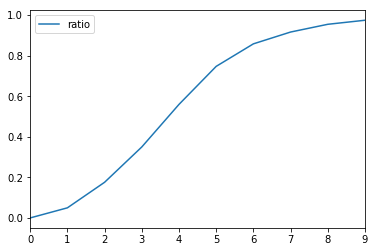

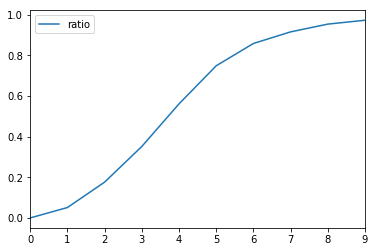

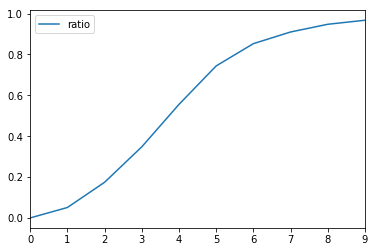

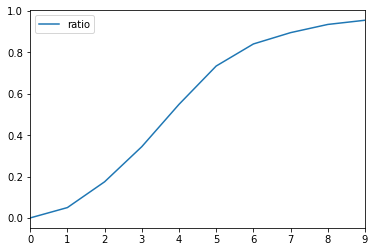

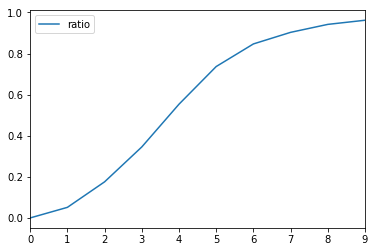

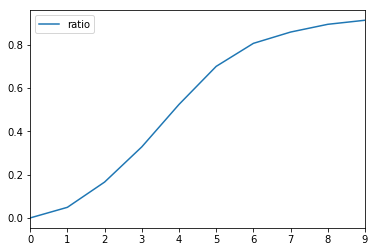

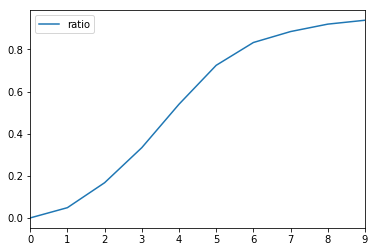

In [8]:
#crime_check = apply_by_multiprocessing(crime_2005, min_dist, axis=1, workers=8)
for j in range(len(crime0)):
    f = []#crime0[0][crime0[0]['Description']<0.5].ID.count()/len(crime0[0])
    for i in range(10):
        f.append(crime0[j][crime0[j]['Description']<0.5*i].ID.count()/len(crime0[j]))
    f = pd.DataFrame({'ratio':f})
    f.plot()

In [9]:
crime.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'weekday', 'crime-pod', 'pod', 'police_count',
       'nearest_police'],
      dtype='object')

In [10]:
for i in range(len(crime0)):
    print(i+5,"년도 범죄 장소로부터 반경 1km내에 경찰서가 1개 이상 있는 경우", len(crime0[i][crime0[i]['Description']<1])/len(crime0[i]))

5 년도 범죄 장소로부터 반경 1km내에 경찰서가 1개 이상 있는 경우 0.18335107684372706
6 년도 범죄 장소로부터 반경 1km내에 경찰서가 1개 이상 있는 경우 0.18067650747880892
7 년도 범죄 장소로부터 반경 1km내에 경찰서가 1개 이상 있는 경우 0.1832064737302216
8 년도 범죄 장소로부터 반경 1km내에 경찰서가 1개 이상 있는 경우 0.17645667447306793
9 년도 범죄 장소로부터 반경 1km내에 경찰서가 1개 이상 있는 경우 0.17196848708994628
10 년도 범죄 장소로부터 반경 1km내에 경찰서가 1개 이상 있는 경우 0.17932588032876773
11 년도 범죄 장소로부터 반경 1km내에 경찰서가 1개 이상 있는 경우 0.1756897404835435
12 년도 범죄 장소로부터 반경 1km내에 경찰서가 1개 이상 있는 경우 0.17615947682833133
13 년도 범죄 장소로부터 반경 1km내에 경찰서가 1개 이상 있는 경우 0.17443603631789237
14 년도 범죄 장소로부터 반경 1km내에 경찰서가 1개 이상 있는 경우 0.17464342890408965
15 년도 범죄 장소로부터 반경 1km내에 경찰서가 1개 이상 있는 경우 0.17562762101747662
16 년도 범죄 장소로부터 반경 1km내에 경찰서가 1개 이상 있는 경우 0.16559766111529597
17 년도 범죄 장소로부터 반경 1km내에 경찰서가 1개 이상 있는 경우 0.1670387781601265


# 반경 1km내에 경찰서가 있는 경우 각 경찰서 주변의 범죄 수

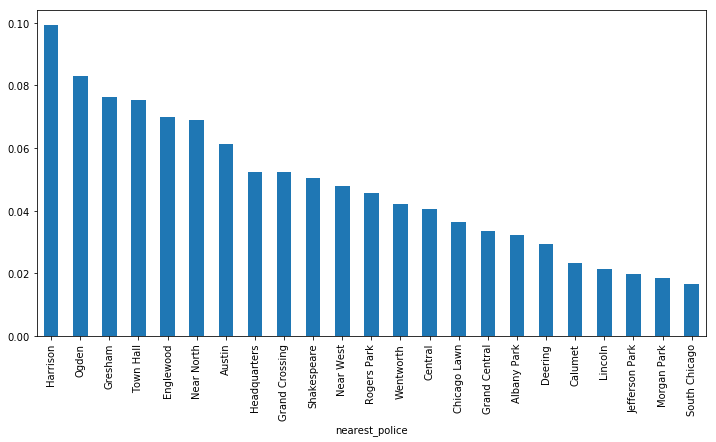

In [11]:
l = []
for i in range(len(crime0)):
    l.append(crime0[i][crime0[i]['police_count']>0].groupby('nearest_police')['ID'].count().sort_values(ascending=False))
    (l[i]/len(crime0[i][crime0[i]['police_count']>0])).plot(kind='bar',figsize = (12,6))
#l[0].plot.bar(figsize = (12,6))
#l[1].plot.bar(figsize = (12,6))

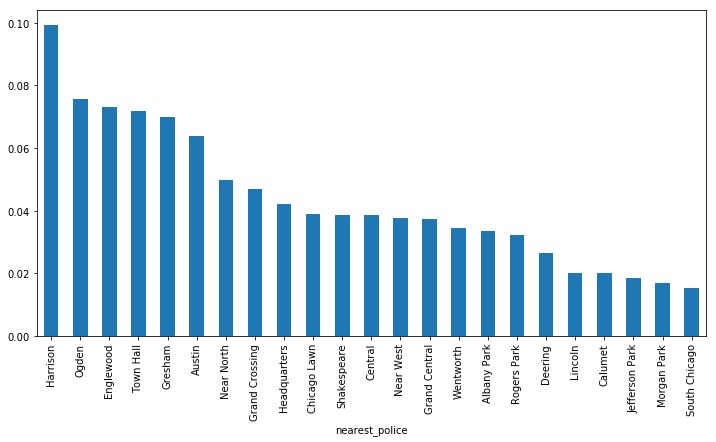

In [12]:
(l[10]/len(crime0[10][crime0[10]['police_count']>0])).plot(kind='bar',figsize = (12,6))

### 반경 2km내에 가장 가까운 경찰서가 있는 경우

In [13]:
P1 = []
for i in range(len(crime0)//3):
    A1 = pd.merge(crime0[3*i][crime0[3*i]['Description']<2].groupby('nearest_police')['ID'].count().to_frame()/len(crime0[3*i][crime0[3*i]['Description']<2]),
                  crime0[3*i+1][crime0[3*i+1]['Description']<2].groupby('nearest_police')['ID'].count().to_frame()/len(crime0[3*i+1][crime0[3*i+1]['Description']<2]),how='outer', left_index=True, right_index=True)
    P1.append(pd.merge(A1,crime0[3*i+2][crime0[3*i+2]['Description']<2].groupby('nearest_police')['ID'].count().to_frame()/len(crime0[3*i+2][crime0[3*i+2]['Description']<2]),how='inner', left_index=True, right_index=True))
    P1[i] = P1[i].rename(index = str,columns = {'ID_x':3*i+5,'ID_y':3*i+6,'ID':3*i+7})

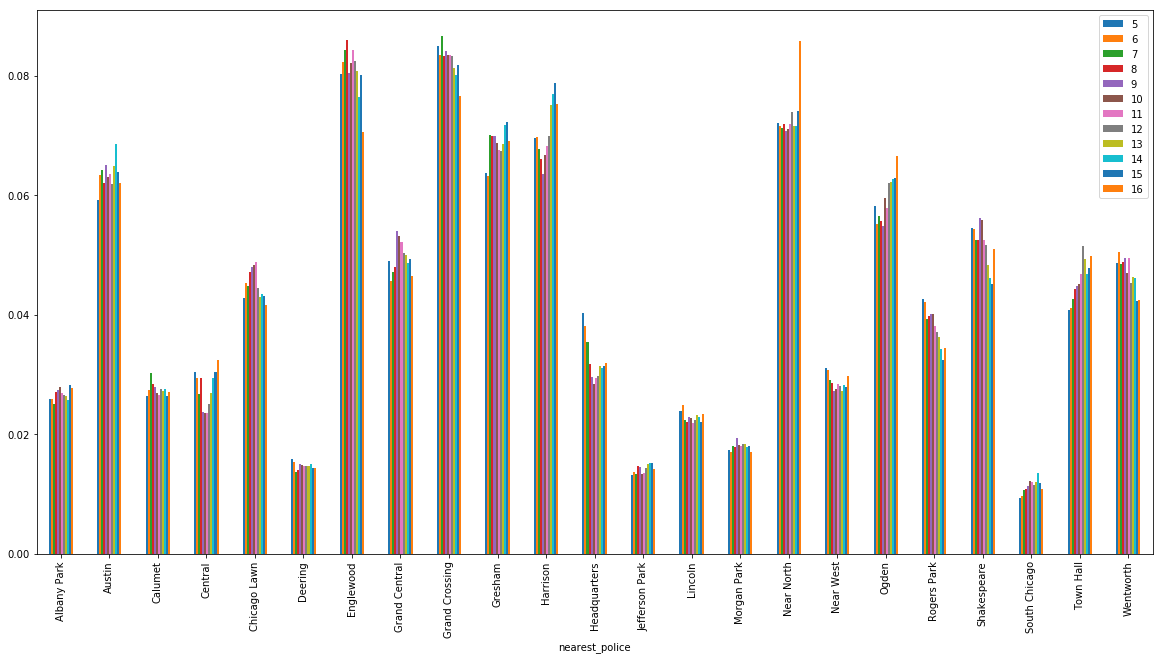

In [14]:
All = P1[0]
for i in range(1,len(P1)):
    All = pd.merge(All,P1[i],how='inner', left_index=True, right_index=True)

#pd.merge(P1[0],P1[1],how='inner', left_index=True, right_index=True)
All.plot.bar(figsize = (20,10))

### 반경 1km내에 가장 가까운 경찰서가 있는 경우

In [15]:

P2 = []
for i in range(len(crime0)//3):
    A1 = pd.merge(crime0[3*i][crime0[3*i]['Description']<1].groupby('nearest_police')['ID'].count().to_frame()/len(crime0[3*i][crime0[3*i]['Description']<1]),
                  crime0[3*i+1][crime0[3*i+1]['Description']<1].groupby('nearest_police')['ID'].count().to_frame()/len(crime0[3*i+1][crime0[3*i+1]['Description']<1]),how='outer', left_index=True, right_index=True)
    P2.append(pd.merge(A1,crime0[3*i+2][crime0[3*i+2]['Description']<1].groupby('nearest_police')['ID'].count().to_frame()/len(crime0[3*i+2][crime0[3*i+2]['Description']<1]),how='inner', left_index=True, right_index=True))
    P2[i] = P2[i].rename(index = str,columns = {'ID_x':3*i+5,'ID_y':3*i+6,'ID':3*i+7})

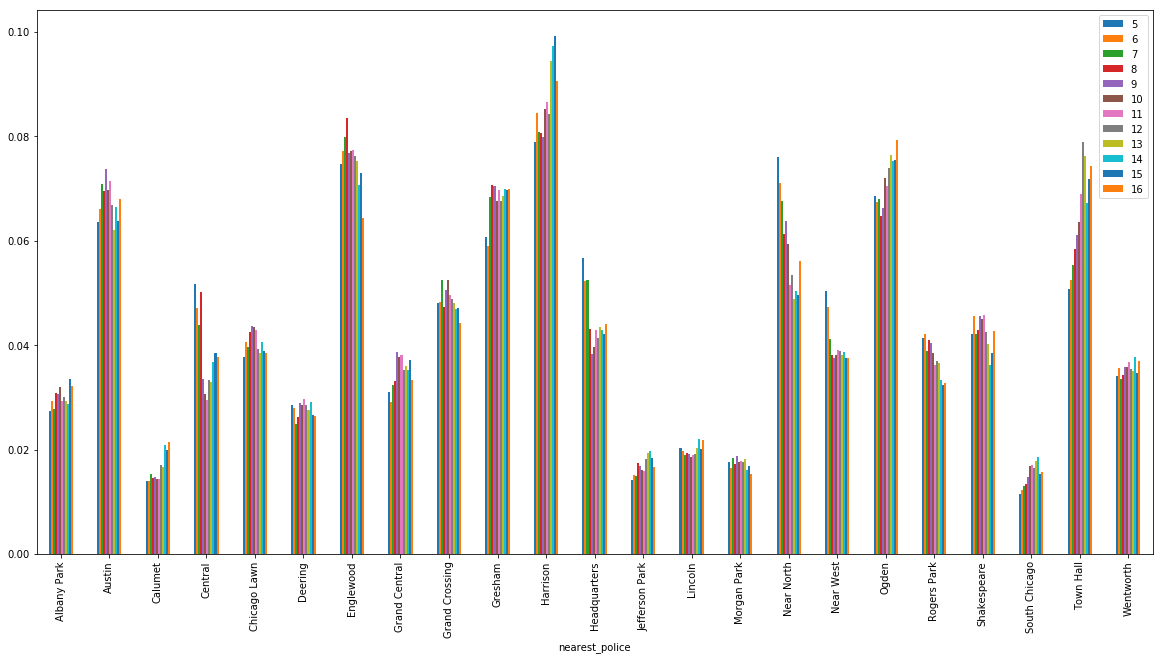

In [16]:
All = P2[0]
for i in range(1,len(P2)):
    All = pd.merge(All,P2[i],how='inner', left_index=True, right_index=True)

All.plot.bar(figsize = (20,10))

In [17]:
for i in range(len(crime0)):
    print(i+5,"년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우", len(crime0[i][crime0[i]['Description']<2])/len(crime0[i]))

5 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.56488063356455
6 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.565528292706878
7 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.5625060073323782
8 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.554480093676815
9 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.5492166347003701
10 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.5635967814688667
11 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.5595443248192826
12 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.5612928010291902
13 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.5556142169035934
14 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.5490612720128074
15 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.5534032903850168
16 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.5241048321536982
17 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.5396416587744747


In [18]:
for i in range(len(crime0)):
    print(i+5,"년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우", len(crime0[i][crime0[i]['Description']<1.5])/len(crime0[i]))

5 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.35595024763768857
6 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.3556239482576228
7 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.35438455165848143
8 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.3494121779859485
9 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.3450449693199966
10 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.3546083391180101
11 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.3497159139381324
12 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.351675709801726
13 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.3479204552120608
14 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.34447678649396013
15 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.345376572610486
16 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.32813001096352207
17 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.33345618012196115


In [19]:
for i in range(len(crime0)):
    print(i+5,"년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우", len(crime0[i][crime0[i]['Description']<0.5])/len(crime0[i]))

5 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.048791347338583646
6 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.04912222752898011
7 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.04994438926598408
8 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.04797189695550351
9 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.04810481888736911
10 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.05021459575238162
11 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.04973070120061197
12 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.05108726079369145
13 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.050976711444829
14 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.04999636151942949
15 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.05143171597184007
16 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.048989043936128164
17 년도 범죄 장소로부터 반경 2km내에 경찰서가 1개 이상 있는 경우 0.048630186884248326


### 범죄 종류에 따른 반경 1km내에 경찰서가 있는 경우와 없는 경우

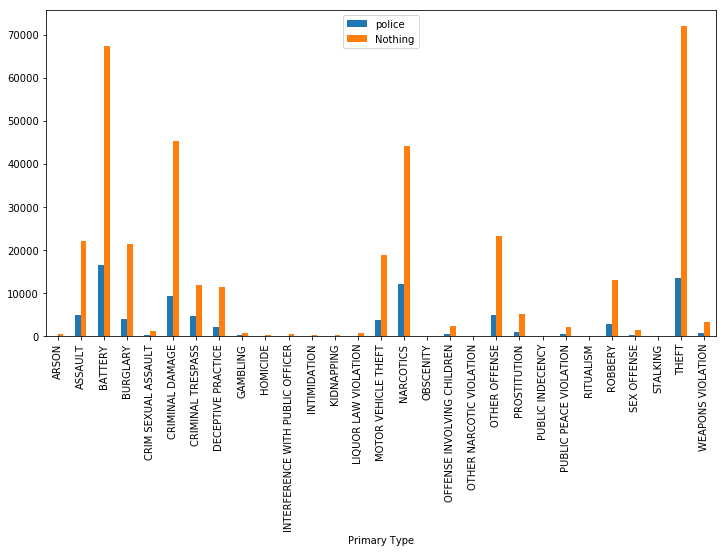

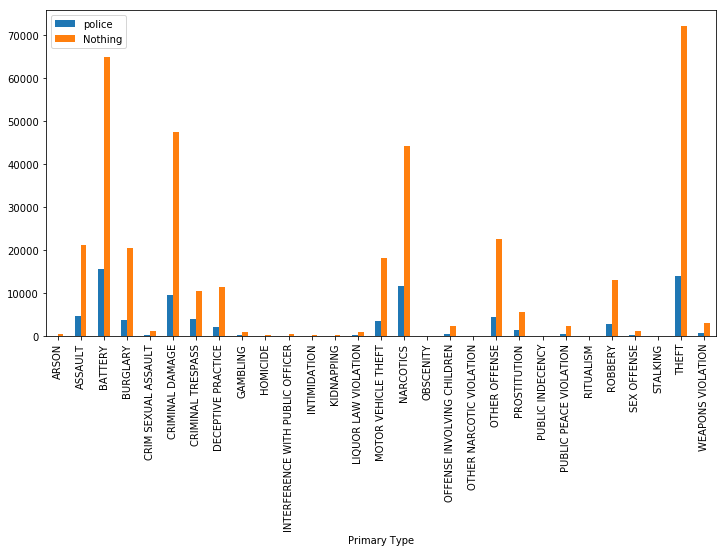

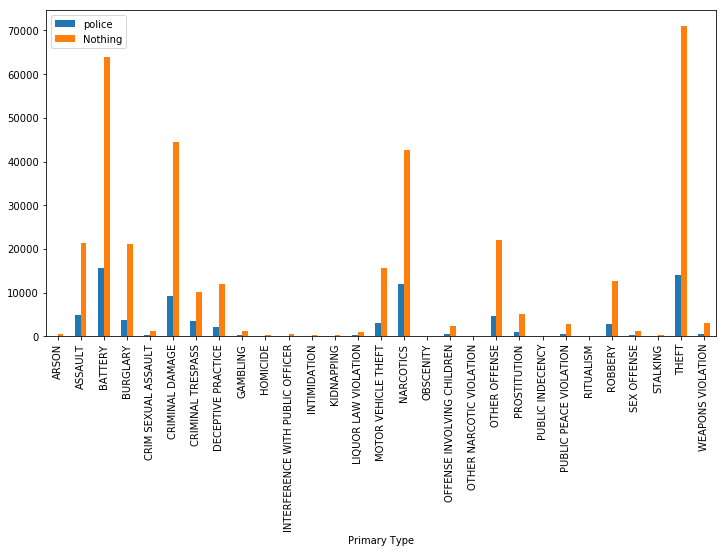

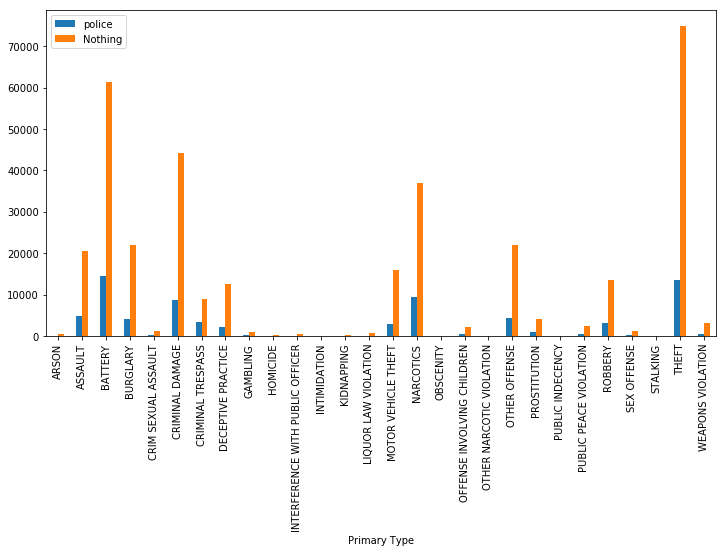

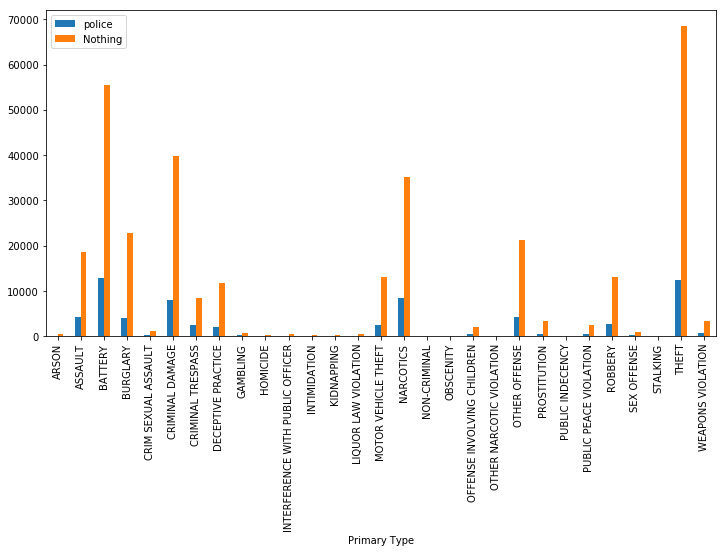

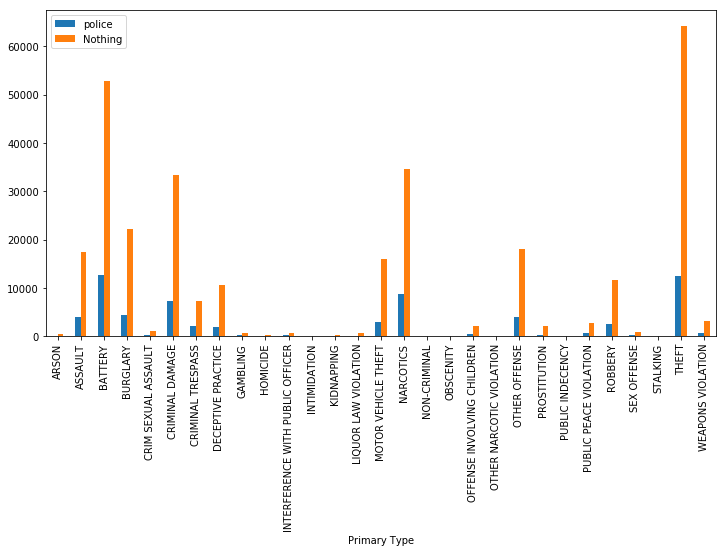

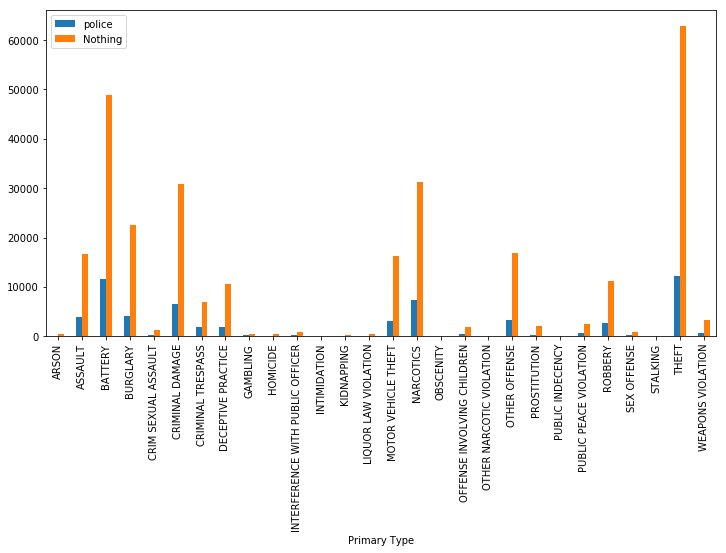

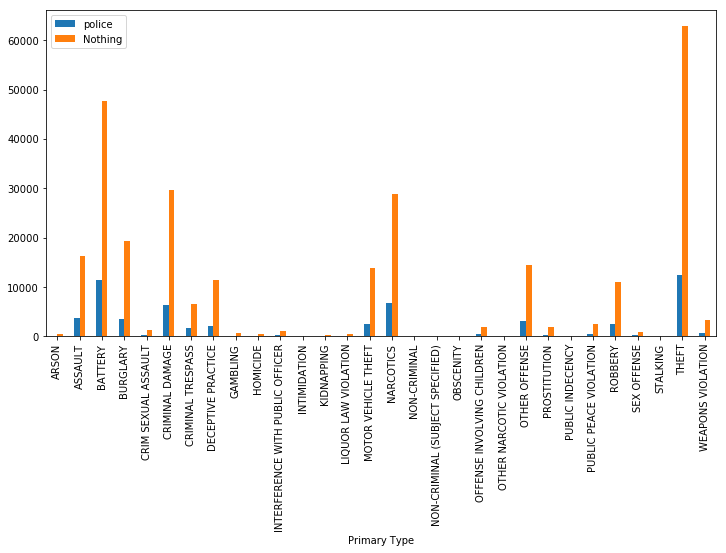

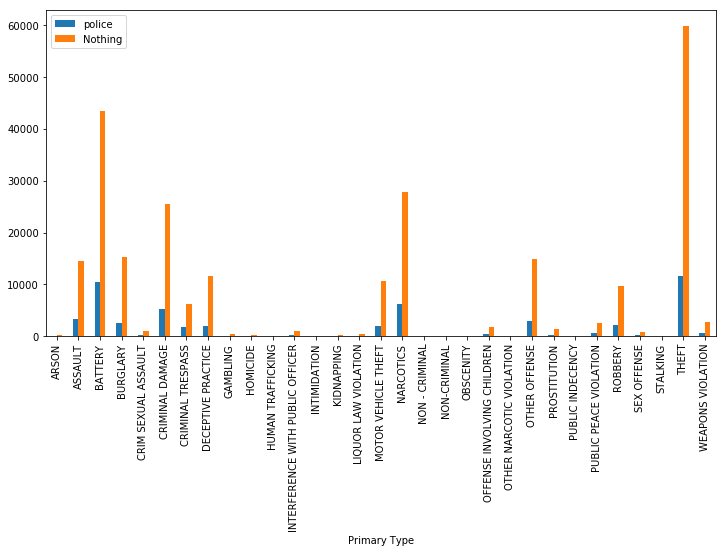

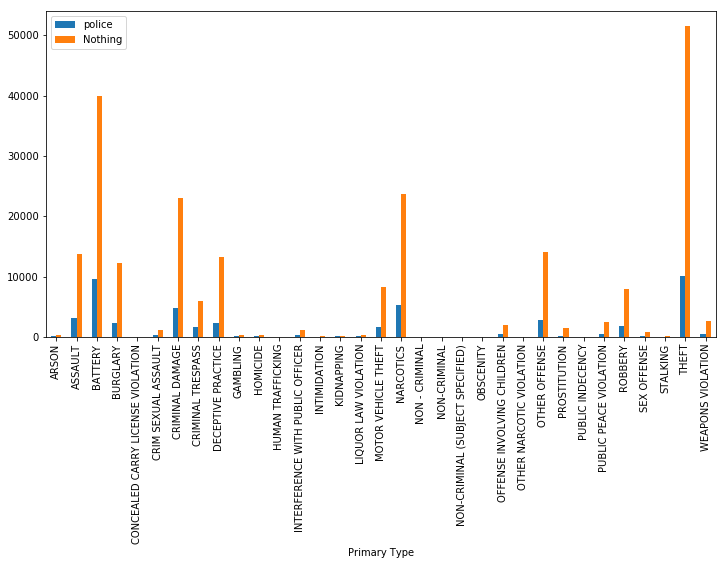

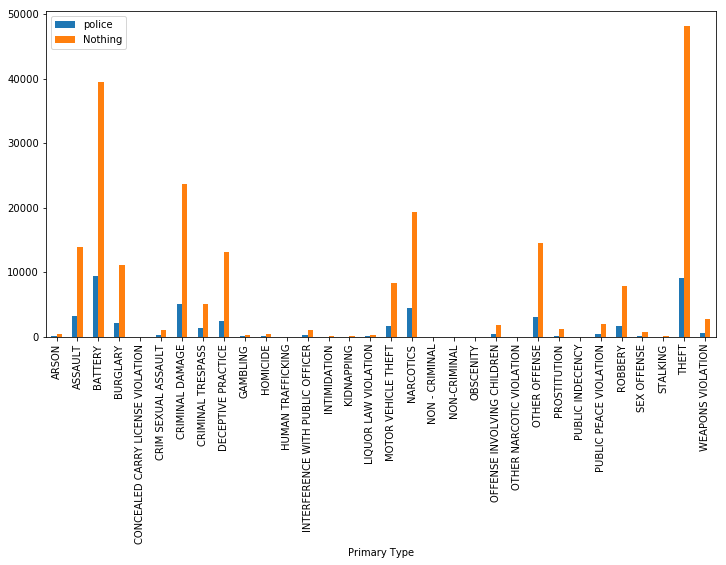

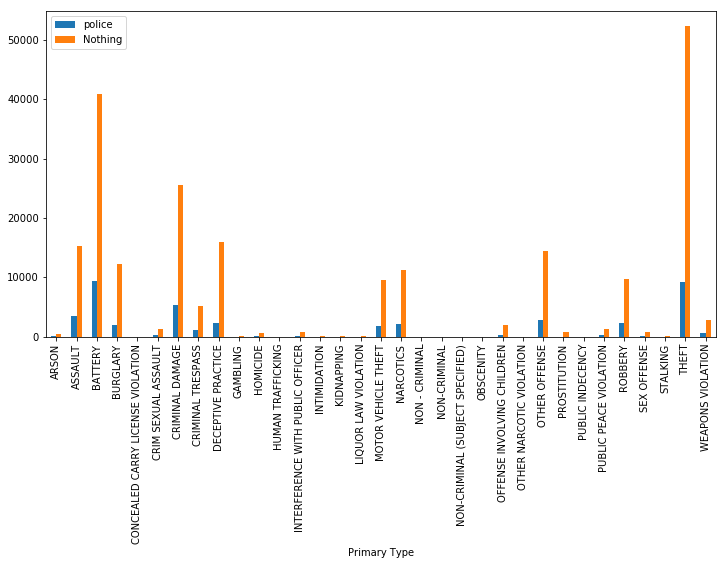

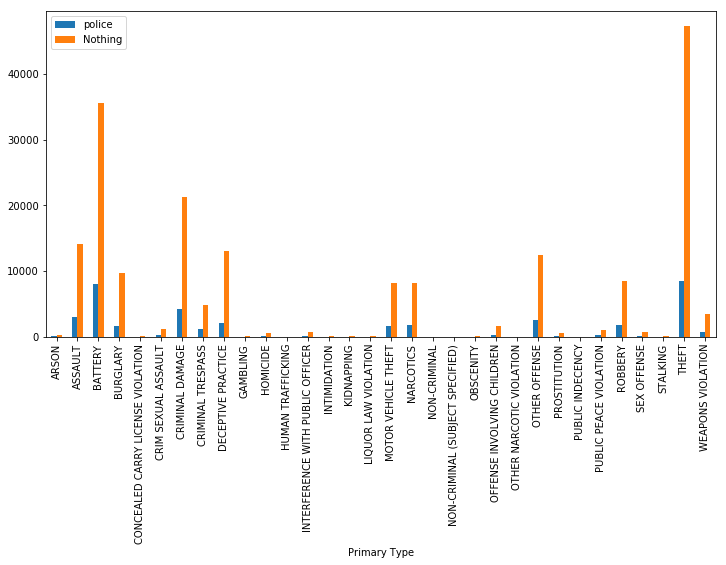

In [20]:
for i in range(len(crime0)):
    pd.merge(crime0[i][crime0[i]['police_count']>0].groupby('Primary Type')['ID'].count().to_frame(),
             crime0[i][crime0[i]['police_count']==0].groupby('Primary Type')['ID'].count().to_frame(),
             how='outer',left_index=True, right_index=True).rename(index=str,columns={"ID_x":"police","ID_y":"Nothing"}).plot(kind='bar',figsize=(12,6))

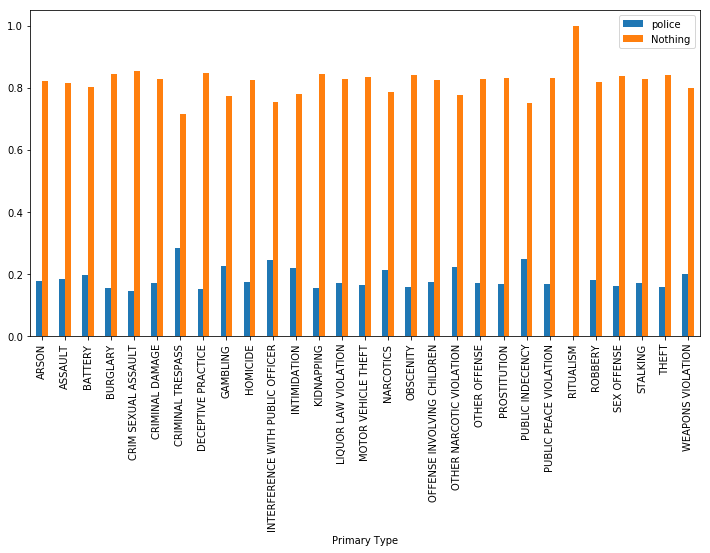

In [21]:
A = crime0[0][crime0[0]['police_count']>0].groupby('Primary Type')['ID'].count().to_frame()/crime0[0].groupby('Primary Type')['ID'].count().to_frame()
B = crime0[0][crime0[0]['police_count']==0].groupby('Primary Type')['ID'].count().to_frame()/crime0[0].groupby('Primary Type')['ID'].count().to_frame()
pd.merge(A,B,how='outer',left_index=True, right_index=True).rename(index=str,columns={"ID_x":"police","ID_y":"Nothing"}).plot.bar(figsize = (12,6))

In [22]:
D1 = []
for i in range(len(crime0)):
    D1.append(crime0[i].groupby(['Primary Type','nearest_police'])['ID'].count())

In [23]:
D1[0]['THEFT']

nearest_police
Albany Park        2482
Austin             2021
Calumet            2159
Central            3537
Chicago Lawn       5369
Deering            1355
Englewood          3675
Grand Central      4337
Grand Crossing     6472
Gresham            4326
Harrison           3650
Headquarters       1633
Jefferson Park     2573
Lincoln            2175
Morgan Park        2123
Near North        11008
Near West          2691
Ogden              2844
Rogers Park        3585
Shakespeare        5844
South Chicago      2311
Town Hall          4877
Wentworth          3258
Name: ID, dtype: int64

# 2010년도 Chicago Community Area population

In [24]:
community = pd.read_csv("community.csv")

In [25]:
community

,NUM,Community Area,2010,POD
0,1,Rogers Park,54991,10
1,2,West Ridge,71942,11
2,3,Uptown,56362,5
3,4,Lincoln Square,39493,3
4,5,North Center,31867,0
5,6,Lake View,94368,6
6,7,Lincoln Park,64116,1
7,8,Near North Side,80484,5
8,9,Edison Park,11187,0
9,10,Norwood Park,37023,2


### 각 경찰서의 관할 구역의 범죄율
##### 각 경찰서의 관할 구역의 범죄율을 보기 위해 정확한 관할 구역을 구하고자 하였으나 사건이 어느 ward에서 발생했는지는 crime data에 존재하지만 그 ward의 인구 수는 알수 없었기 때문에, 각 경찰서의 관할 구역을 대체할 수단으로 community area를 사용함

In [26]:
C = crime0[5][crime0[5]['Community Area']!=0].groupby(['District','Community Area'])['ID'].count().to_frame()
a = []
for i in range(len(police_station)-1):
    a.append(C.loc[(int(police_station['DISTRICT'][i]),slice(None)),:])
    a[i] = a[i].reset_index()

In [27]:
p = []
for i in range(len(a)):#district의 community area의 전체 인구
    k = 0
    for j in range(len(a[i])):
        k = k + float(community[community['NUM']==a[i]['Community Area'][j]]['2010'])
    p.append(k)

In [28]:
crime0[5][(crime0[5]['District']==a[0]['District'][0]) & (crime0[5]['Community Area'] == a[0]['Community Area'][0])]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Year,Updated On,Latitude,Longitude,Location,weekday,crime-pod,pod,police_count,nearest_police
2332562,7576503,HS380384,2010-06-26 17:00:00,004XX N DEARBORN ST,0281,CRIM SEXUAL ASSAULT,1.879027,SIDEWALK,False,False,...,2010,02/04/2016 06:33:39 AM,41.889803,-87.629600,"(41.8898033, -87.629599599)",Sat,0.213486,2909,0,Near North
2380277,7650578,HS455303,2010-08-10 12:50:00,003XX N WELLS ST,1320,CRIMINAL DAMAGE,1.826089,STREET,False,False,...,2010,02/04/2016 06:33:39 AM,41.888378,-87.633986,"(41.888378392, -87.633985587)",Tue,0.398170,2900,0,Near North
2492843,7824499,HS634917,2010-11-27 12:45:00,011XX N STATE ST,0460,BATTERY,1.230390,SMALL RETAIL STORE,False,False,...,2010,02/04/2016 06:33:39 AM,41.902796,-87.628502,"(41.90279601, -87.628501862)",Sat,100.000000,a,0,Near North


In [29]:
check = []

for j in range(len(a)):
    x = 0
    for i in range(len(a[j])):
        #crime0[5][crime0[5]['Community Area']==a[0]['Community Area'][i]]
        #print(community[community['NUM']==a[0]['Community Area'][i]])
        x += (float)(community[community['NUM']==a[j]['Community Area'][i]]['2010'])
    check.append(x)
    check[j]=(sum(a[j]['ID'])/check[j])

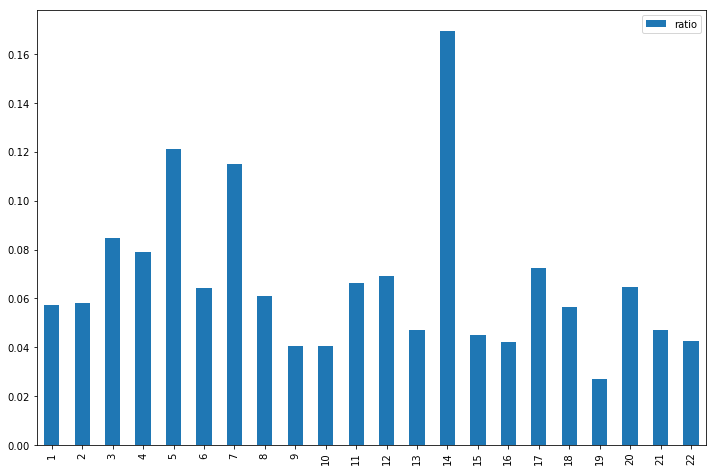

In [30]:
G = pd.DataFrame({'ratio':check})
G.index += 1
G.plot.bar(figsize = (12,8))

### 범죄 장소로부터 가장 가까운 경찰서의 담당 범죄들의 community area 범죄율
##### 한 범죄에 대해 실제로 담당한 경찰서가 아니라 가장 가까운 경찰서로 묶어서 각 경찰서가 있는 community area와 인접한 community area의 범죄율을 보고자 함.

In [31]:
J = crime0[5].groupby(['nearest_police','Community Area'])['ID'].count().to_frame()

In [32]:
J_c = []
for i in range(len(police_station)-1):
    J_c.append(J.loc[(police_station['DISTRICT NAME'][i],slice(None)),:])
    J_c[i] = J_c[i].reset_index()

In [33]:
J_a = []

for j in range(len(J_c)):
    x = 0
    for i in range(len(J_c[j])):        
        x += (float)(community[community['NUM']==float(police_station[police_station['DISTRICT NAME']==J_c[j]['nearest_police'][i]]['DISTRICT'])]['2010'])
    J_a.append(x)
    J_a[j]=(sum(a[j]['ID'])/J_a[j])

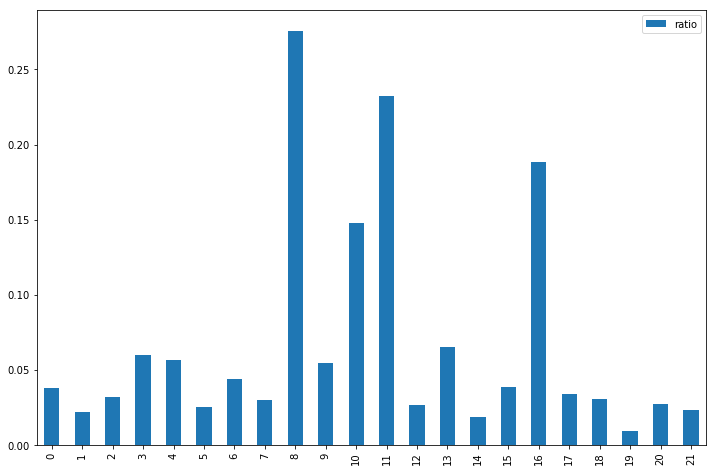

In [34]:
pd.DataFrame({'ratio':J_a}).plot.bar(figsize = (12,8))

In [35]:
Z = crime0[5].groupby('Community Area')['ID'].count().reset_index()
Z[Z['Community Area']==30]

,Community Area,ID
30,30.0,6288


# Community Area 각각의 범죄율

### 2010년도 범죄 중 각 community area 분포 (전체 범죄 중 어느 community area에서 많이 일어났는가)

In [36]:
#F는 2010년도 범죄 중 community area로 groupby
F = crime0[5][crime0[5]['Community Area']>0].groupby('Community Area')['ID'].count().to_frame()

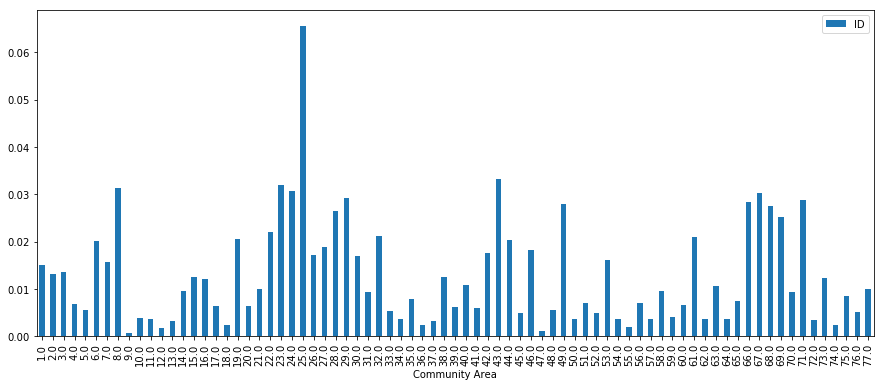

In [37]:
(F/len(crime0[5])).plot(kind = 'bar',figsize=(15,6))

### 각 community area의 인구 수 대비 범죄율

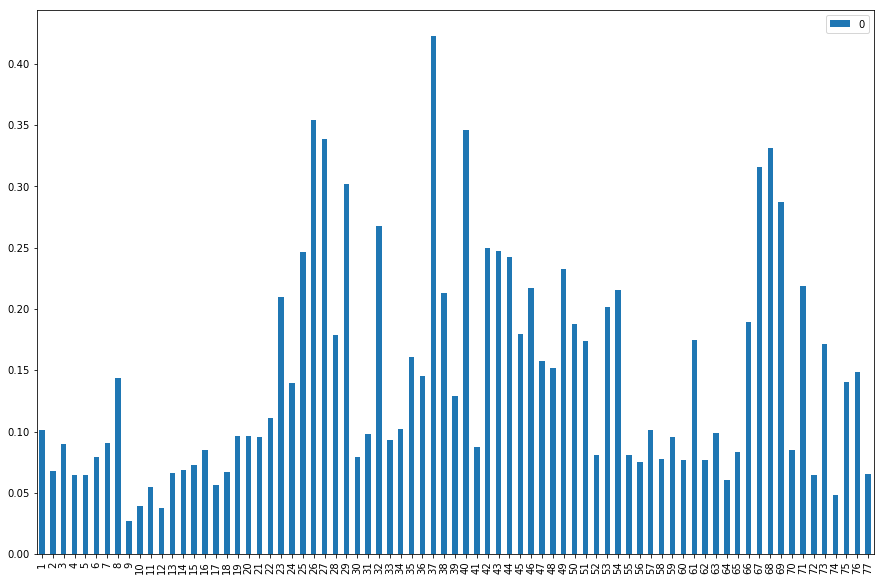

In [38]:
G = (F.reset_index()['ID']/community['2010']).to_frame()
G.index += 1
G.plot.bar(figsize=(15,10))

### 경찰서가 있는 community area와 경찰서가 없는 community area의 인구수 대비 범죄율

In [39]:
H = F.reset_index()[F.reset_index()['Community Area']==police_station['COMMUNITY AREA'][0]]
P = community[community['NUM']==H['Community Area'][H['Community Area'].index[0]]]

#H는 경찰서가 있는 community area의 범죄 수, P는 경찰서가 있는 Communuty area의 인구 수
for i in range(1,len(police_station)-1):
    H = pd.concat([H,F.reset_index()[F.reset_index()['Community Area']==police_station['COMMUNITY AREA'][i]]]) 
    #community[community['NUM']==police_station['COMMUNITY AREA'][i]]['police'] = 1

In [40]:
H = H.set_index('Community Area')

In [41]:
for i in range(1, len(H)):
    P = pd.concat([P,community[community['NUM']==H.index[i]]])

In [42]:
P = P.groupby('NUM')['2010'].sum().to_frame().reset_index().rename(index=str,columns={"NUM":"Community Area","2010":"ID"}).set_index('Community Area')

In [43]:
H/P

,ID
Community Area,
1.0,0.101398
4.0,0.064822
6.0,0.079042
8.0,0.144053
11.0,0.054936
14.0,0.068818
19.0,0.096364
22.0,0.110945
25.0,0.246605


In [44]:
C_1 = F.reset_index().set_index('Community Area')
for i in range(len(H)):
    C_1 = C_1.drop(H.index[i])

In [45]:
P1 = community[community['NUM']==C_1.index[0]]
for i in range(1, len(C_1)):
    P1 = pd.concat([P1,community[community['NUM']==C_1.index[i]]])

In [46]:
del P1['Community Area']

In [47]:
del P1['POD']


In [48]:
P1 = P1.rename(index =str,columns={"NUM":"Community Area","2010":"ID"}).set_index('Community Area')

#### 경찰서가 있는 community area의 경우 붉은색 bar, 없는 경우는 푸른색 bar

/Users/yi/anaconda/lib/python3.6/site-packages/pandas/plotting/_core.py:178: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


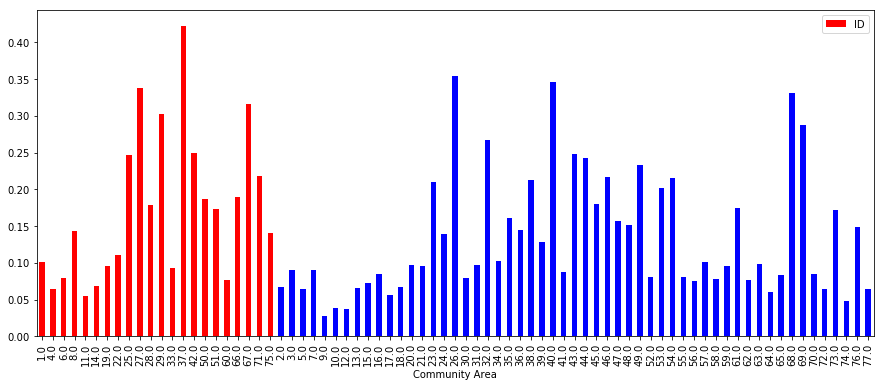

In [49]:
color = []

V = pd.concat([H/P,C_1/P1])
for i in range(len(V)):
    if (i<len(H)):
        color.append("r")
    else : color.append("b")

V.plot(kind = 'bar',figsize=(15,6),colors = color)

# T-test

## 경찰서가 있는 community area와 없는 area 비교
#### 귀무 가설: 경찰서가 있는 community area의 범죄율은 경찰서가 없는 community area의 범죄율과 같다.
#### 대립 가설: 경찰서가 있는 community area의 범죄율은 경찰서가 없는 community area의 범죄율과 다르다.

In [50]:
X_1 = H/P  #경찰서가 있는 community area
X_2 = C_1/P1#경찰서가 없는 community area

In [51]:
tTestResult = stats.ttest_ind(X_1, X_2)

In [52]:
print("The t-statistic and p-value assuming equal variances is %.3f and %.3f" % tTestResult)

The t-statistic and p-value assuming equal variances is 1.873 and 0.065


# 범죄 종류별 T test

##### 귀무가설: 각 범죄종류에 대해 각 community area의 범죄율은 경찰서가 있건 없건 같다.
##### 대립가설: 각 범죄종류에 대해 각 community area의 범죄율은 경찰서가 있는 community area와 경찰서가 없는 community area가 다르다.

In [53]:
Type = crime0[5][crime0[5]['Community Area']>0].groupby(['Primary Type','Community Area'])['ID'].count().to_frame()
crime_type = crime0[5].groupby('Primary Type').count().ID.index

In [54]:
crime_type

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE',
       'GAMBLING', 'HOMICIDE', 'INTERFERENCE WITH PUBLIC OFFICER',
       'INTIMIDATION', 'KIDNAPPING', 'LIQUOR LAW VIOLATION',
       'MOTOR VEHICLE THEFT', 'NARCOTICS', 'NON-CRIMINAL', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'ROBBERY', 'SEX OFFENSE', 'STALKING', 'THEFT',
       'WEAPONS VIOLATION'],
      dtype='object', name='Primary Type')

In [55]:
W = []
for i in range(len(crime_type)):
    W.append(Type.loc[(crime_type[i],slice(None)),:])
    W[i] = W[i].reset_index()
    

In [56]:
for j in range(len(W)):
    if (sum(W[j]['ID'])<10):
        continue
    H = []
    P = []
    H = W[j][W[j]['Community Area']==police_station['COMMUNITY AREA'][0]]
   
    crime_t = W[j]['Primary Type'][0]
    #H는 경찰서가 있는 community area의 범죄 수, P는 경찰서가 있는 Communuty area의 인구 수
    for i in range(1,len(police_station)-1):
        H = pd.concat([H,W[j][W[j]['Community Area']==police_station['COMMUNITY AREA'][i]]]) 
        #community[community['NUM']==police_station['COMMUNITY AREA'][i]]['police'] = 1
    P = community[community['NUM']==H['Community Area'][H['Community Area'].index[0]]]
    H = H.set_index('Community Area')

    for i in range(1, len(H)):
        P = pd.concat([P,community[community['NUM']==H.index[i]]])

    P = P.groupby('NUM')['2010'].sum().to_frame().reset_index().rename(index=str,columns={"NUM":"Community Area","2010":"ID"}).set_index('Community Area')
    del H['Primary Type']

    C_1 = W[j].set_index('Community Area')
    del C_1['Primary Type']
    for i in range(len(H)):
        C_1 = C_1.drop(H.index[i])


    P1 = community[community['NUM']==C_1.index[0]]
    for i in range(1, len(C_1)):
        P1 = pd.concat([P1,community[community['NUM']==C_1.index[i]]])

    del P1['Community Area']
    del P1['POD']

    #del P1['Primary Type']
    P1 = P1.rename(index =str,columns={"NUM":"Community Area","2010":"ID"}).set_index('Community Area')

    X_1 = (H/P)  #경찰서가 있는 community area
    X_2 = (C_1/P1)#경찰서가 없는 community area

    tTestResult = stats.ttest_ind(X_1, X_2)
    

    print(crime_t, ": The t-statistic and p-value assuming equal variances is %.3f and %.3f" % tTestResult)
    
    print()

ARSON : The t-statistic and p-value assuming equal variances is 0.057 and 0.955

ASSAULT : The t-statistic and p-value assuming equal variances is 1.652 and 0.103

BATTERY : The t-statistic and p-value assuming equal variances is 1.521 and 0.132

BURGLARY : The t-statistic and p-value assuming equal variances is 1.053 and 0.296

CRIM SEXUAL ASSAULT : The t-statistic and p-value assuming equal variances is 1.856 and 0.067

CRIMINAL DAMAGE : The t-statistic and p-value assuming equal variances is 1.173 and 0.244

CRIMINAL TRESPASS : The t-statistic and p-value assuming equal variances is 1.803 and 0.075

DECEPTIVE PRACTICE : The t-statistic and p-value assuming equal variances is 1.278 and 0.205

GAMBLING : The t-statistic and p-value assuming equal variances is 1.493 and 0.141

HOMICIDE : The t-statistic and p-value assuming equal variances is 0.443 and 0.659

INTERFERENCE WITH PUBLIC OFFICER : The t-statistic and p-value assuming equal variances is 1.434 and 0.157

INTIMIDATION : The t

# 경찰서의 유무와 체포율

In [57]:
ar = crime0[5][crime0[5]['Community Area']>0].groupby(['Arrest','Community Area'])['ID'].count().to_frame()
ar_type = crime0[5].groupby('Arrest').count().ID.index

In [58]:
W = []
for i in range(len(ar_type)):
    W.append(ar.loc[(ar_type[i],slice(None)),:])
    W[i] = W[i].reset_index()


In [59]:
for j in range(len(W)):
    if (sum(W[j]['ID'])<10):
        continue
    H = []
    P = []
    H = W[j][W[j]['Community Area']==police_station['COMMUNITY AREA'][0]]
   
    crime_t = W[j]['Arrest'][0]
    #H는 경찰서가 있는 community area의 범죄 수, P는 경찰서가 있는 Communuty area의 인구 수
    for i in range(1,len(police_station)-1):
        H = pd.concat([H,W[j][W[j]['Community Area']==police_station['COMMUNITY AREA'][i]]]) 
        #community[community['NUM']==police_station['COMMUNITY AREA'][i]]['police'] = 1
    P = crime0[5][crime0[5]['Community Area']==H['Community Area'][H['Community Area'].index[0]]].groupby('Community Area')['ID'].count().to_frame().reset_index()
    H = H.set_index('Community Area')

    for i in range(1, len(H)):
        P = pd.concat([P,crime0[5][crime0[5]['Community Area']==H.index[i]].groupby('Community Area')['ID'].count().to_frame().reset_index()])
    P = P.set_index('Community Area')
    #P = P.groupby('NUM')['2010'].sum().to_frame().reset_index().rename(index=str,columns={"NUM":"Community Area","2010":"ID"}).set_index('Community Area')
    del H['Arrest']
 
    C_1 = W[j].set_index('Community Area')
    del C_1['Arrest']
    for i in range(len(H)):
        C_1 = C_1.drop(H.index[i])


    P1 = crime0[5][crime0[5]['Community Area']==C_1.reset_index()['Community Area'][C_1.reset_index()['Community Area'].index[0]]].groupby('Community Area')['ID'].count().to_frame().reset_index()
    for i in range(1, len(C_1)):
        P1 = pd.concat([P1,crime0[5][crime0[5]['Community Area']==C_1.index[i]].groupby('Community Area')['ID'].count().to_frame().reset_index()])
    P1 = P1.set_index('Community Area')
    #del P1['Community Area']
    #del P1['POD']
    #del P1['police']
    #del P1['Primary Type']
    #P1 = P1.rename(index =str,columns={"NUM":"Community Area","2010":"ID"}).set_index('Community Area')

    X_1 = H/P  #경찰서가 있는 community area
    X_2 = C_1/P1#경찰서가 없는 community area

    tTestResult = stats.ttest_ind(X_1, X_2)
#    tTestResultDiffVar = stats.ttest_ind(X_1, X_2, equal_var=False)

    print(crime_t, ": The t-statistic and p-value assuming equal variances is %.3f and %.3f" % tTestResult)
    print()

False : The t-statistic and p-value assuming equal variances is -2.098 and 0.039

True : The t-statistic and p-value assuming equal variances is 2.098 and 0.039



# 범죄별 체포율

In [60]:
crime0[5].groupby('Arrest')['ID'].count().to_frame()/len(crime0[5])

,ID
Arrest,
False,0.728748
True,0.271252


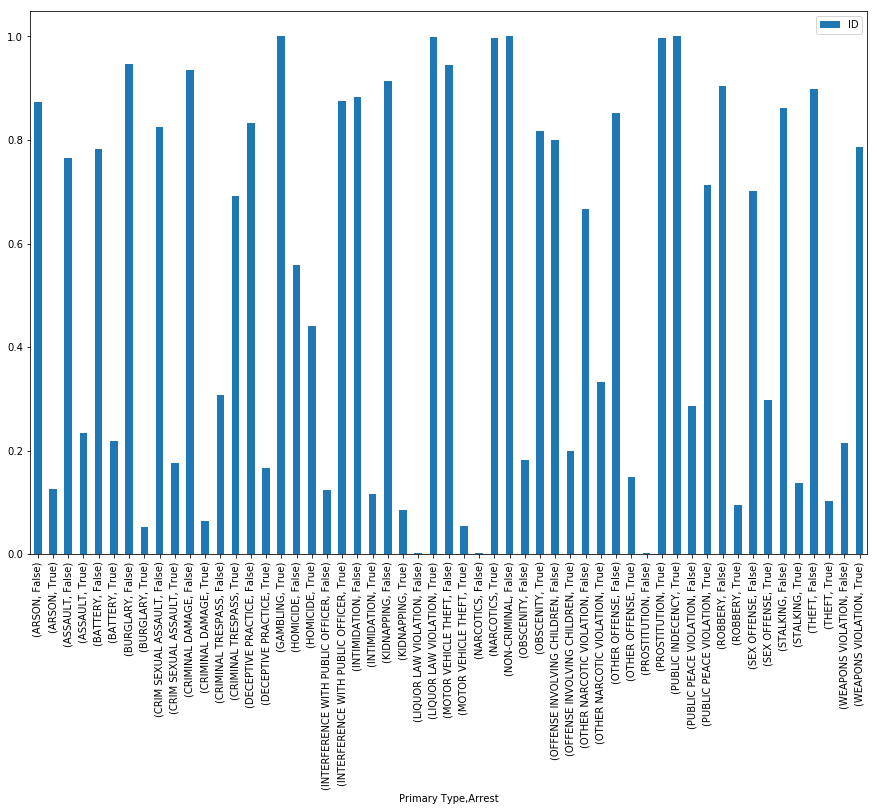

In [61]:
(crime0[5].groupby(['Primary Type','Arrest'])['ID'].count().to_frame()/crime0[5].groupby('Primary Type')['ID'].count().to_frame()).plot.bar(figsize=(15,10))

In [62]:
community.head()

,NUM,Community Area,2010,POD
0,1,Rogers Park,54991,10
1,2,West Ridge,71942,11
2,3,Uptown,56362,5
3,4,Lincoln Square,39493,3
4,5,North Center,31867,0


In [63]:
community = pd.read_csv("community.csv")

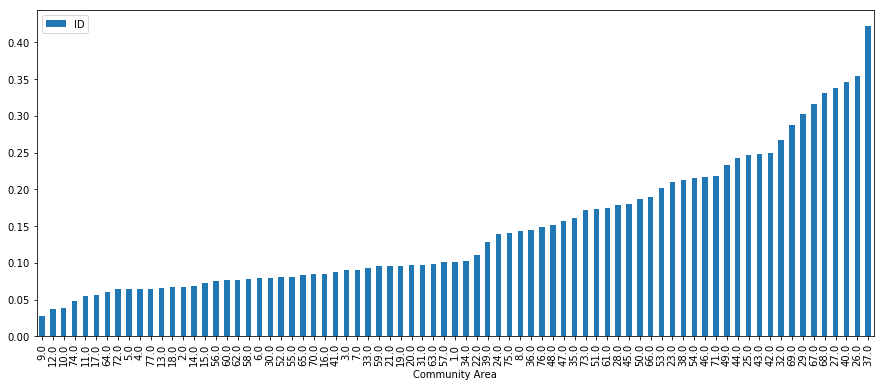

In [64]:
L = (crime0[5][crime0[5]['Community Area']>0].groupby('Community Area')['ID'].count().to_frame()/(community.groupby('NUM')['2010'].sum().reset_index().rename(index=str,columns={"NUM":"Community Area","2010":"ID"}).set_index('Community Area'))).sort_values('ID')
L.plot(kind='bar',figsize=(15,6))

In [65]:
L.reset_index().rename(index=str,columns={"Community Area":"Community Area","ID":"rate"}).groupby('Community Area')['rate'].sum().to_frame().sort_values('rate')

,rate
Community Area,
9.0,0.027264
12.0,0.037551
10.0,0.039003
74.0,0.047976
11.0,0.054936
17.0,0.056043
64.0,0.060461
72.0,0.064191
5.0,0.064706


In [66]:
community[community['NUM']==(L.reset_index()['Community Area'][0])]['Community Area'].iloc[0]

'Edison Park'

In [67]:
L1 = L.reset_index()

In [68]:
for i in range(len(community)):
    L1['Community Area'][i]=community[community['NUM']==(L.reset_index()['Community Area'][i])]['Community Area'].iloc[0]

/Users/yi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [69]:
L1.rename(index=str,columns={"Community Area":"Community Area","ID":"rate"}).set_index('Community Area').sort_values('rate',ascending=False)

,rate
Community Area,
Fuller Park,0.422462
West Garfield Park,0.354258
Washington Park,0.345908
East Garfield Park,0.338406
Englewood,0.331572
West Englewood,0.316068
North Lawndale,0.302127
Greater Grand Crossing,0.287406
Loop,0.267732
